# **Neural Style Transfer**

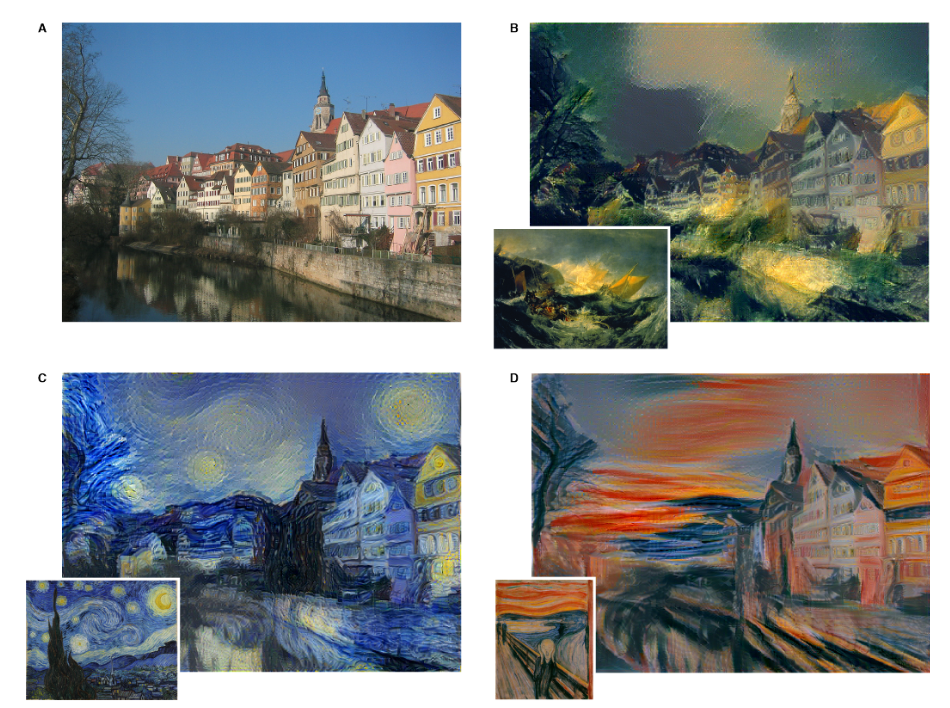

## ***Importing Necessary Libraries***

In [16]:
import tensorflow_hub    as hub
import tensorflow        as tf
import matplotlib.pyplot as plt
import numpy             as np
import cv2

## ***Loading and Preprocessing the Input Images***

In [17]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]
  return img

In [18]:
content_image = load_image("/content/content_image.jpg")
style_image   = load_image("/content/style_image.jpg")

## ***Visualizing the Loaded Input Images***

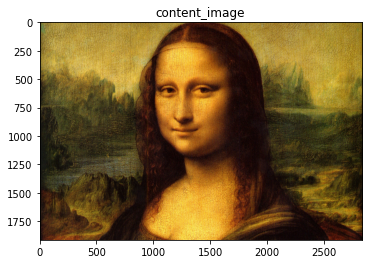

In [19]:
plt.imshow(np.squeeze(content_image))
plt.title("content_image")
plt.show()

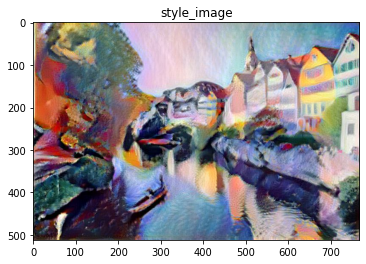

In [20]:
plt.imshow(np.squeeze(style_image))
plt.title("style_image")
plt.show()

## ***Loading the Pre-Trained Model***

In [21]:
model = hub.load("http://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

## ***Visualizing the Stylized Output Image***

In [22]:
stylized_image = model(tf.constant(content_image),tf.constant(style_image))[0]

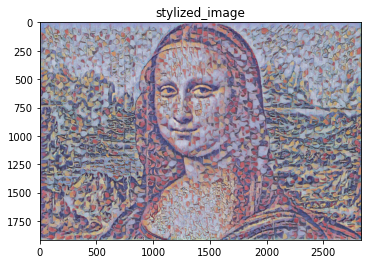

In [23]:
plt.imshow(np.squeeze(stylized_image))
plt.title("stylized_image")
plt.show()

## ***Storing the Resultant Stylized Output Image***

In [24]:
cv2.imwrite("stylized_image.jpg",cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True